# PyBATS

> PyBATS is a package for Bayesian time series modeling and forecasting. It is designed to be flexible, offering many options to customize the model form, prior, and forecast period. The focus of the package is the class Dynamic Generalized Linear Model ('dglm'). The supported DGLMs are Poisson, Bernoulli, Normal (a DLM), and Binomial. These models are based upon *Bayesian Forecasting and Dynamic Models*, by West and Harrison (1997).

## Install

PyBATS is hosted on _PyPI_ and can be installed with pip:

    $ pip install pybats

The most recent development version is hosted on [GitHub](https://github.com/lavinei/pybats). You can download and install from there:

```
$ git clone git@github.com:lavinei/pybats.git pybats
$ cd pybats
$ sudo python setup.py install
```

## Quick Start

This provides the most basic example of Bayesian time series analysis using PyBATS. We'll use a public dataset of the sales of a dietary weight control product, along with the advertising spend. These are integer valued counts, which we model with a Poisson Dynamic Generalized Linear Model (DGLM).

First we load in the data, and take a quick look at the first couples of entries:

In [ ]:
import numpy as np

from pybats_nbdev.shared import load_sales_example
from pybats_nbdev.analysis import *
from pybats_nbdev.point_forecast import *
from pybats_nbdev.plot import *

data = load_sales_example()                                 # Load example sales and advertising data. Source: Abraham & Ledolter (1983)
data.head(3)

,Sales,Advertising
1,15,12.0
2,16,20.5
3,18,21.0


Second, we extract the outcome (_Y_) and covariate (_X_) from this dataset. We'll set the forecast horizon _k=1_ for this example. We could look at multiple forecast horizons by setting k to a larger value. Then the 'analysis' function will automatically perform marginal forecasts across horizons _1:k_.

Finally, we set the start and end time for forecasting. In this case we specify the start and end date with integers, because there are no dates associated with this dataset.

In [ ]:
Y = data['Sales'].values
X = data['Advertising'].values

k = 1                                                       # Forecast 1 step ahead
forecast_start = 15                                         # Start forecast at time step 15
forecast_end = 35                                           # End forecast at time step 35 (final time step)

We use the _analysis_ function as a helper to a) define the model b) Run sequential updating (forward filtering) and c) forecasting. By default, it will return samples from the forecast distribution as well as the model after the final observation.

In [ ]:
mod, samples = analysis(Y, X, family="poisson",
forecast_start=forecast_start,      # First time step to forecast on
forecast_end=forecast_end,          # Final time step to forecast on
k=k,                                # Forecast horizon. If k>1, default is to forecast 1:k steps ahead, marginally
prior_length=6,                     # How many data point to use in defining prior
rho=.5,                             # Random effect extension, increases variance of Poisson DGLM (see Berry and West, 2019)
deltrend=0.95,                      # Discount factor on the trend component (intercept)
delregn=0.95                        # Discount factor on the regression component
)

beginning forecasting


The model has the posterior mean and variance of the state vector stored as ```mod.a``` and ```mod.C``` respectively.  In this example, we are purely interested in the forecasts. We plot the sales, median forecast, and 95\% credible interval.

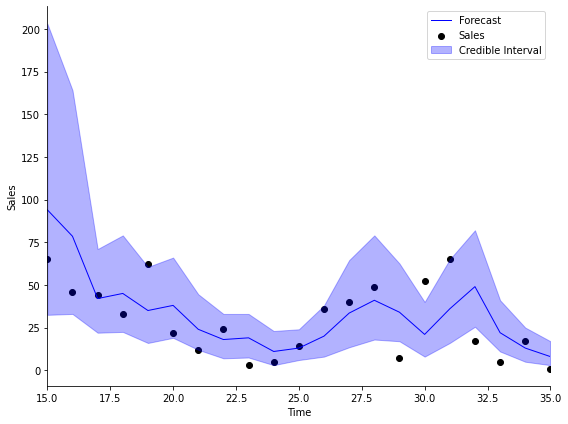

In [ ]:
import matplotlib.pyplot as plt


forecast = median(samples)                                  # Take the median as the point forecast


fig, ax = plt.subplots(1,1, figsize=(8, 6))   # Plot the 1-step ahead point forecast plus the 95% credible interval
ax = plot_data_forecast(fig, ax, Y[forecast_start:forecast_end + k], forecast, samples,
                        dates=np.arange(forecast_start, forecast_end+1, dtype='int'))
ax = ax_style(ax, ylabel='Sales', xlabel='Time', xlim=[forecast_start, forecast_end],
              legend=['Forecast', 'Sales', 'Credible Interval'])